In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import pandas as pd
from scipy.linalg import toeplitz
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color #pip install scikit-image
# convolution
from scipy.signal import convolve2d

## Multivariate Data Covariance Matrices
In Chapter 4 - Vector Applications, we learned how to compute the Pearson correlation coefficient as the vector  dot  product  between  two  data  variables,  divided  by  the  product  of  the  vector norms. That formula was for two variables. What if you have multiple variables?
The  purpose  of this section is to show you how to compute covariance and correlation matrices from multivariate datasets.
Let’s  start  with  <i>covariance</i>.  <b><u>Covariance</b></u>  is  simply  the  numerator  of  the  correlation equation, in  other  words,  the  dot  product  between  two  mean-centered  variables. Covariance  is  interpreted  in  the  same  way  as  correlation  (positive  when  variables move together, negative when variables move apart, zero when the variables have no linear relationship), except that covariance retains the scale of the data, and therefore is not bound by ±1.<br>
Covariance  also  has  a  normalization  factor  of  n  −  1,  where  n  is  the  number  of  data points.  That  normalization  prevents  the  covariance  from  growing  larger  as  we  sum more  data  values  together  (analogous  to  dividing  by  N  to  transform  a  sum  into  an average). Here is the equation for covariance:
<a id="Covariance equation"></a><br>
$$ c_{a,b} = (n-1)^{-1} \sum_{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y}) $$
If  we  call  $\tilde{x}$  to  be  the  mean-centered  variable  x,  then  covariance  is simply 
$$ \tilde{x}^T \tilde{y} / n− 1$$
The  key  insight  to  implementing  this  formula  for  multiple  variables  is  that  matrix multiplication  is  an  organized  collection  of  dot  products  between  rows  of  the  left matrix and columns of the right matrix.<br>
So  here’s  what  we  do:<br>
Create  a  matrix  in  which  each  column  corresponds  to  each variable (a variable is a data feature). Let’s call that matrix X. Now, the multiplication XX  is  not  sensible  (and  probably  not  even  valid,  because  data  matrices  tend  to  be tall,  thus  M  >  N).  But  if  we  were  to  transpose  the  first  matrix,  then  the  rows  of $$X^T$$  correspond  to  the  columns  of  X.  Therefore,  the  matrix  product  $$X^TX$$  encodes  all of  the  pair-wise  covariances  (assuming  the  columns  are  mean  centered,  and  when dividing by n − 1). In other words, the $$(i,j)^th$$ element in the covariance matrix is the dot product between data features i and j. <br>
The matrix equation for a covariance matrix is elegant and compact:<br>
#### $$ C = (X^TX) (1/n− 1) $$
Matrix C is symmetric. That comes from the proof in Chapter 5 - Matrix, that any matrix times its transpose is square symmetric, but it also makes sense statistically: covariance and correlation are symmetric, meaning that, for example, the correlation between height and weight is the same as the correlation between weight and height.
The Diagonals elements of C contains the covariances of each variable with  itself,  which  in  statistics  is  called  the  variance,  and  quantifies  the  dispersion around the mean (variance is the squared standard deviation).<br>
As  you  learned  in  Chapter 4 - Vector Applications,  computing  a  correlation  from  a  covariance  simply involves  scaling  by  the  norms  of  the  vectors.  This  can  be  translated  into  a  matrix equation,  which  will  allow  you  to  compute  the  data  correlation  matrix  without  for loops.
#### NumPy  has  functions  to  compute  covariance  and  correlation  matrices np.cov()  and  np.corrcoef() respectively.

### Geometric Transformations via Matrix-Vector Multiplication
A  “pure  rotation  matrix”  rotates  a  vector  while  preserving  its  length.  You  can  think about  the  hands  of  an  analog  clock:  as  time  ticks  by,  the  hands  rotate  but  do  not change in length. A 2D rotation matrix can be expressed as:
$$ T = \begin{bmatrix} \cos(\theta) & \sin(\theta)\\ -\sin(\theta) & \cos(\theta) \end{bmatrix}$$
A  pure  rotation  matrix  is  an  example  of  an  orthogonal  matrix.  I would like to point out that the columns of T are orthogonal (their dot product is cos(θ) sin(θ) − sin(θ) cos(θ)) and are unit vectors Recall the trig identity that $$cos^2(θ) + sin^2(θ) = 1$$


## Image Feature Detection
Image  filtering  is  actually  an  extension  of  time  series  filtering. Recall from Chapter 4 - Vector Applications  that  to  filter  or detect  features  in  a  time  series  signal,  we  design  a  kernel  and  then  create  a  time series of dot products between the kernel and overlapping segments of the signal.
Image  filtering  works  the  same  way  except  in  2D  instead  of  1D.  We  design  a  2D kernel  and  then  create  a  new  image  comprising  “dot  products”  between  the  kernel and overlapping windows of the image.The  operation  here  is  not  formally the  same  as  the  vector  dot  product.  The  computation  is  the  same—element-wise multiplication  and  sum, however,  the  operation  takes  place  between  two  matrices, so the implementation is Hadamard multiplication and sum over all matrix elements. Graph  A  in  Figure  7-4  illustrates  the  procedure.  There  are  additional  details  of convolution—for example, padding the image so that the result is the same size—that you  would  learn  about  in  an  image-processing  book. But for now, focus  on the  linear  algebra  aspects,  in  particular,  the  idea  that  the  dot  product  quantifies  the relationship  between  two  vectors  (or  matrices),  which  can  be  used  for  filtering  and feature detection.<br>
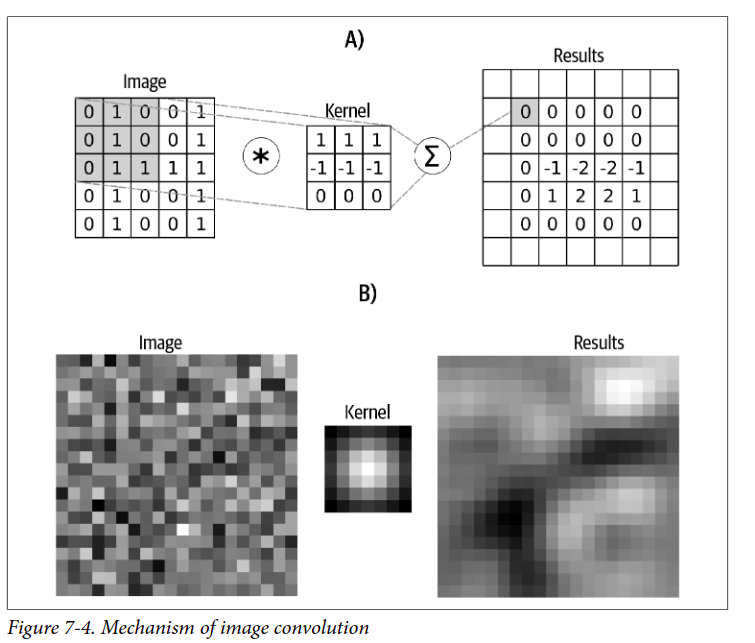

### 2D Gaussian Kernel
A 2D Gaussian is given by the following equation:-
$$ G = exp(-(X^2 + Y^2)/\sigma) $$
exp stands for the natural exponential (the constante  =  2.71828...),  and  exp(x)  is  used  instead  of  $$e^x$$  when  the  exponential  term  is  long. <br>The  X  and  Y  are  2D  grids  of  x,y  coordinates  on  which  to  evaluate  the  function.<br>Finally,  σ  is  a  parameter  of  the  function  that  is  often  called  the  “shape”  or  “width”: smaller  values  make  the  Gaussian  narrower,  while  larger  values  make  the  Gaussian wider. 

In [2]:
# Code for the above formula
Y,X = np.meshgrid(np.linspace(-3,3,21),np.linspace(-3,3,21))
kernel = np.exp(-(X**2 + Y**2)/20)
kernel = kernel/np.sum(kernel) #Normalise

The  X  and  Y  grids  go  from  −3  to  +3  in  21  steps.  <br>The  width  parameter  is  hardcoded  to  20.  <br>The  third  line  normalizes  the  values  in  the  kernel  so  that  the  sum  over the  entire  kernel  is  1.  That  preserves  the  original  scale  of  the  data.  <br>When  properly normalized, each step of convolution and therefore, each pixel in the filtered image becomes a weighted average of the surrounding pixels, with the weights defined by the Gaussian.

## Code Exercises

### Question 7-1. In  this  exercise,  you  will  transform  the  covariance  matrix  into  a  correlation  matrix.<br>The procedure involves dividing each matrix element (that is, the covariance between each pair of variables) by the product of the variances of those two variables.<br>This is implemented by pre- and post multiplying the covariance matrix by a diagonal matrix  containing  inverted  standard  deviations  of  each  variable  (standard  deviationis  the  square  root  of  variance).  <br>The  standard  deviations  are  inverted  because  we need  to  divide  by  the  variances  although  we  will  multiply  matrices. <br> The  reason  for pre-  and  post multiplying  by  standard  deviations  is  the  special  property  of  pre-  and post multiplying by a diagonal matrix, which was explained in Exercise 5-11.<br>Equation 7-1 shows the formula.<br>Exercise 7-1. Correlation from covariance R = SCS <br> C is  the  covariance  matrix,  and  S  is  a  diagonal  matrix  of  reciprocated  standard deviations  per  variable  (that  is,  the  ith  diagonal  is  $$ 1/σ_i $$  where  $$σ_i$$  is  the  standard deviation of variable i).<br>Your  goal  in  this  exercise  is  to  compute  the  correlation  matrix  from  the  covariancematrix,  by  translating  Equation  7-1  into  Python  code.  You  can  then  reproduce Figure 7-6.
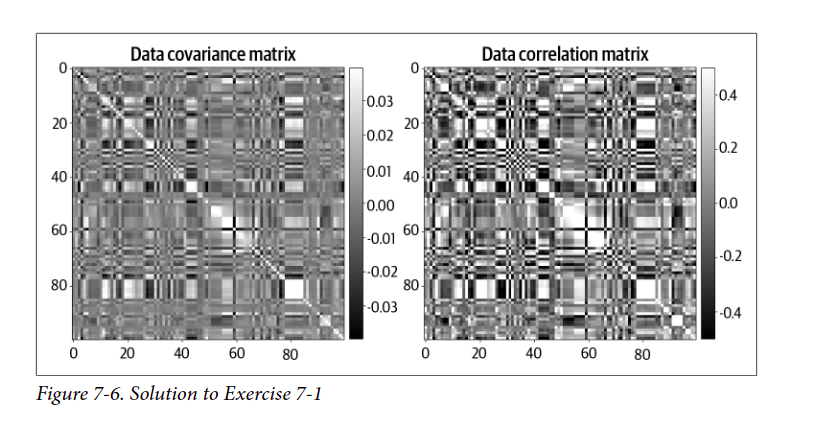

In [4]:
# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

In [5]:
# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat

array([[0.19, 0.33, 0.02, ..., 0.2 , 0.32, 0.2 ],
       [0.  , 0.16, 0.12, ..., 0.45, 0.  , 0.67],
       [0.  , 0.42, 0.49, ..., 0.02, 0.  , 0.43],
       ...,
       [0.16, 0.37, 0.25, ..., 0.18, 0.91, 0.23],
       [0.08, 0.51, 0.06, ..., 0.33, 0.22, 0.19],
       [0.2 , 0.78, 0.14, ..., 0.05, 1.  , 0.48]])

In [6]:
# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# confirm that any given feature has mean=0 (or very close...)
print(np.mean(dataMatM[:,0]))


# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

2.4498401746994428e-18


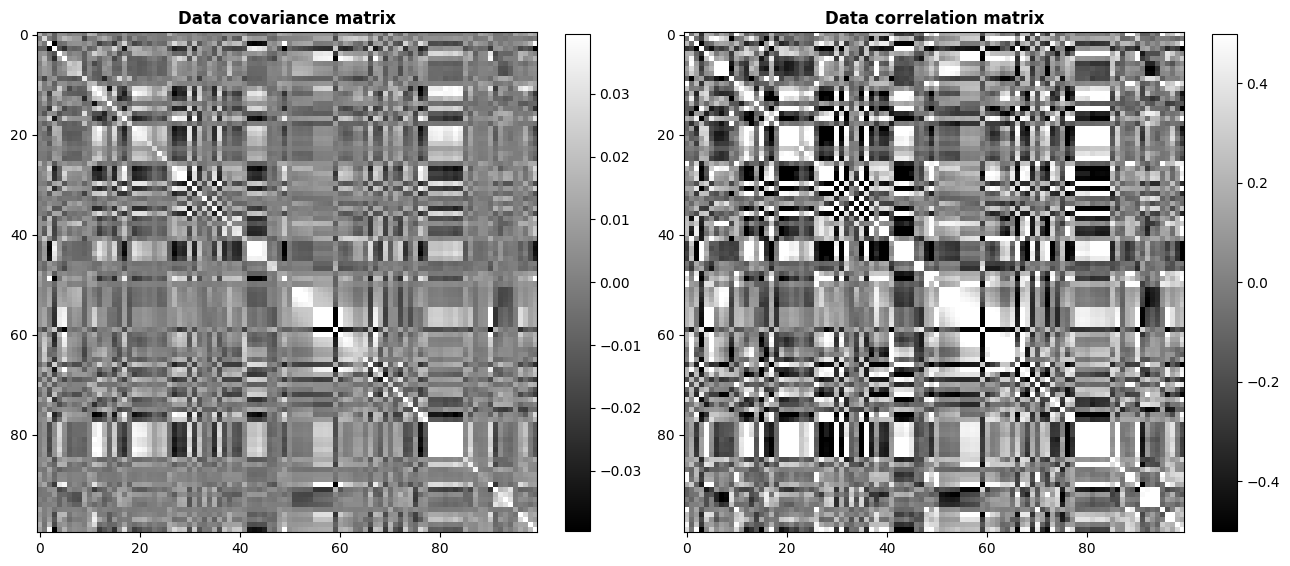

In [9]:
#Actual Solution
variances = np.diag(covMat) # variances are the diagonals of a covariance
standard_devs = np.sqrt( variances )
S = np.diag( 1/standard_devs )
# you can also do this in one line:
S = np.diag( 1/np.sqrt(np.diag(covMat)) )
# compute the correlation matrix
corrMat = S @ covMat @ S
# and show the matrices
# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2
fig,axs = plt.subplots(1,2,figsize=(13,6))
h1 = axs[0].imshow(covMat,vmin=-clim,vmax=clim,cmap='gray')
axs[0].set_title('Data covariance matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title('Data correlation matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_07_06.png',dpi=300)
plt.show()

### Question 7.2. NumPy  has  a  function  np.corrcoef()  that  returns  a  correlation  matrix,  given  an input data matrix. Use this function to reproduce the correlation matrix you created in  the  previous  exercise.  Show  both  matrices,  and  their  difference,  in  a  figure  like Figure 7-7 to confirm that they are the same.<br>
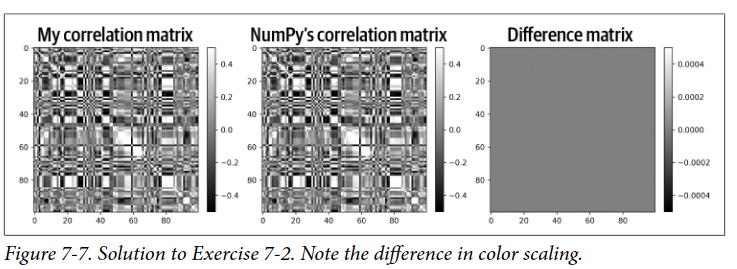
### Next,  inspect  the  source  code  of  np.corrcoef()  by  evaluating  ??np.corrcoef().<br>NumPy uses a slightly different implementation of broadcast dividing by the standard deviations  instead  of  pre-  and  post multiplying  by  a  diagonal  matrix  of  inverted standard deviations, but you should be able to understand how their code implementation matches the math and the Python code you wrote in the previous exercise.

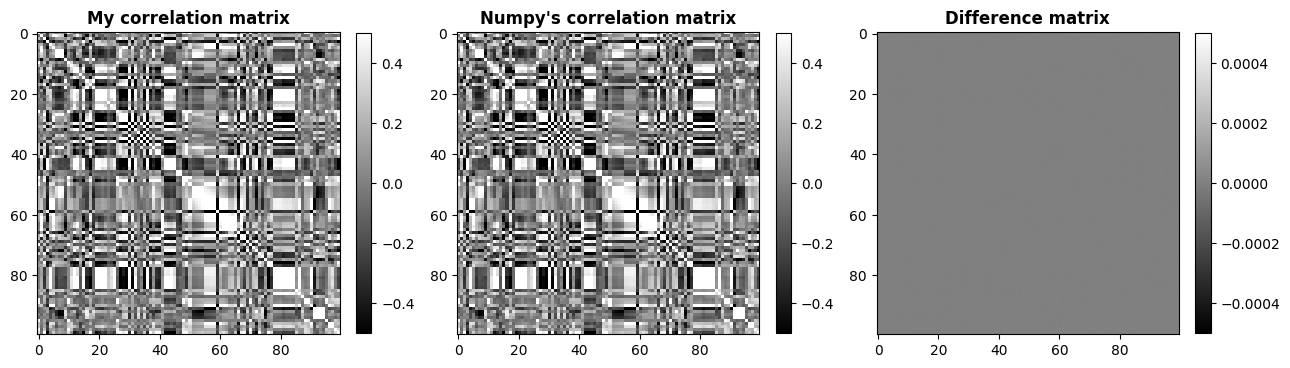

In [10]:
# numpy's correlation function (note transposing the matrix!)
corrMat_np = np.corrcoef(dataMat.T)


# and show it
fig,axs = plt.subplots(1,3,figsize=(13,6))
h1 = axs[0].imshow(corrMat,vmin=-.5,vmax=.5,cmap='gray')
axs[0].set_title('My correlation matrix',fontweight='bold')

h2 = axs[1].imshow(corrMat_np,vmin=-.5,vmax=.5,cmap='gray')
axs[1].set_title("Numpy's correlation matrix",fontweight='bold')

h3 = axs[2].imshow(corrMat_np-corrMat,vmin=-.0005,vmax=.0005,cmap='gray')
axs[2].set_title('Difference matrix',fontweight='bold')

fig.colorbar(h1,ax=axs[0],fraction=.045)
fig.colorbar(h2,ax=axs[1],fraction=.045)
fig.colorbar(h3,ax=axs[2],fraction=.045)

plt.tight_layout()
plt.savefig('Figure_07_07.png',dpi=300)
plt.show()

In [11]:
??np.corrcoef

Signature:
np.corrcoef(
    x,
    y=None,
    rowvar=True,
    bias=<no value>,
    ddof=<no value>,
    *,
    dtype=None,
)
Source:   
@array_function_dispatch(_corrcoef_dispatcher)
def corrcoef(x, y=None, rowvar=True, bias=np._NoValue, ddof=np._NoValue, *,
             dtype=None):
    """
    Return Pearson product-moment correlation coefficients.

    Please refer to the documentation for `cov` for more detail.  The
    relationship between the correlation coefficient matrix, `R`, and the
    covariance matrix, `C`, is

    .. math:: R_{ij} = \\frac{ C_{ij} } { \\sqrt{ C_{ii} C_{jj} } }

    The values of `R` are between -1 and 1, inclusive.

    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observ

In [12]:
??np.cov

Signature:
np.cov(
    m,
    y=None,
    rowvar=True,
    bias=False,
    ddof=None,
    fweights=None,
    aweights=None,
    *,
    dtype=None,
)
Source:   
@array_function_dispatch(_cov_dispatcher)
def cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None,
        aweights=None, *, dtype=None):
    """
    Estimate a covariance matrix, given data and weights.

    Covariance indicates the level to which two variables vary together.
    If we examine N-dimensional samples, :math:`X = [x_1, x_2, ... x_N]^T`,
    then the covariance matrix element :math:`C_{ij}` is the covariance of
    :math:`x_i` and :math:`x_j`. The element :math:`C_{ii}` is the variance
    of :math:`x_i`.

    See the notes for an outline of the algorithm.

    Parameters
    ----------
    m : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `m` represents a variable, and each column a single
        observation of all those variables. Also see 

### Question 7-3. The  goal  of  this  exercise  is  to  show  points  in  a  circle  before  and  after  applying a  transformation,   Use  the  following  transformation  matrix  and  then  create  a  graph  that looks like Figure 7-8:
$$ T = \begin{bmatrix} 1 & 0.5\\ 0 & 0.5\end{bmatrix}$$
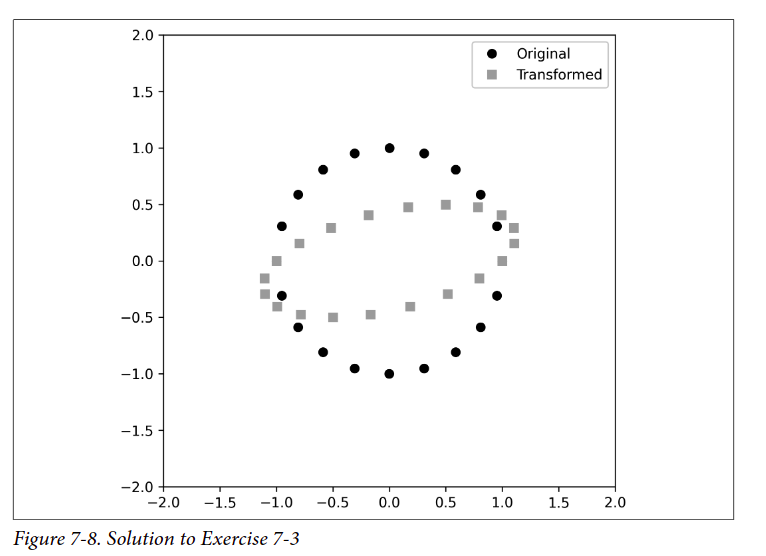

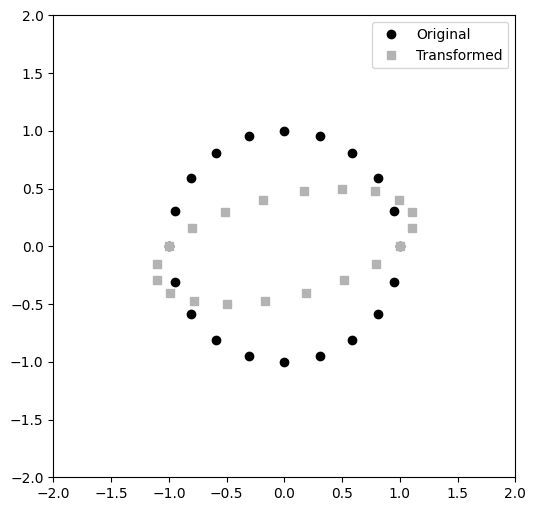

In [14]:
# Transformation matrix
T = np.array([
              [1,.5],
              [0,.5]
            ])


# define the set of points (a circle)
theta = np.linspace(0,2*np.pi-2*np.pi/20,20)
origPoints = np.vstack( (np.cos(theta),np.sin(theta)) )

# apply transformation
transformedPoints = T @ origPoints


# plot the points
plt.figure(figsize=(6,6))
plt.plot(origPoints[0,:],origPoints[1,:],'ko',label='Original')
plt.plot(transformedPoints[0,:],transformedPoints[1,:],'s',
         color=[.7,.7,.7],label='Transformed')

plt.axis('square')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.legend()
plt.show()

### Question 7.4. Figure  7-9  shows  one frame  of  the  movie.  Create  a  Python  function  that  applies  a  transformation  matrix  to  a  matrix  of coordinates, and tell matplotlib to create an animation using that function. Use the following transformation matrix:
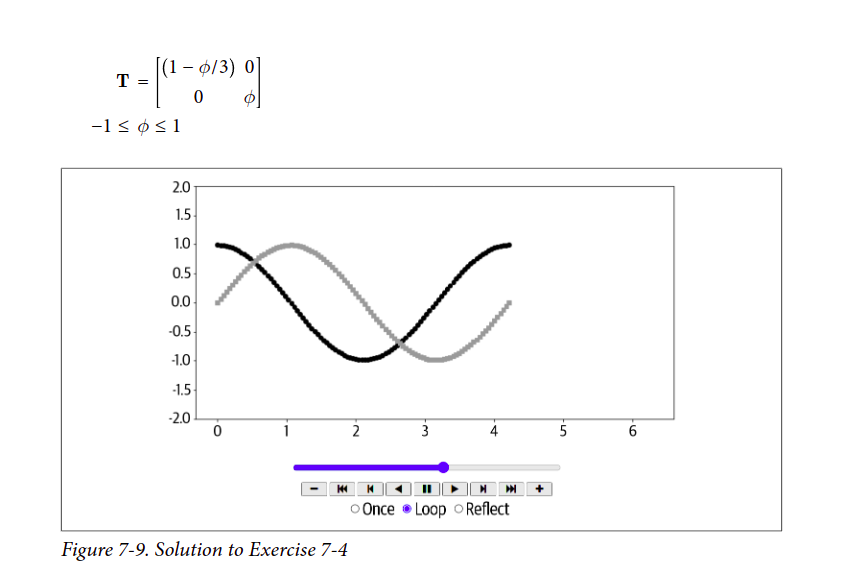

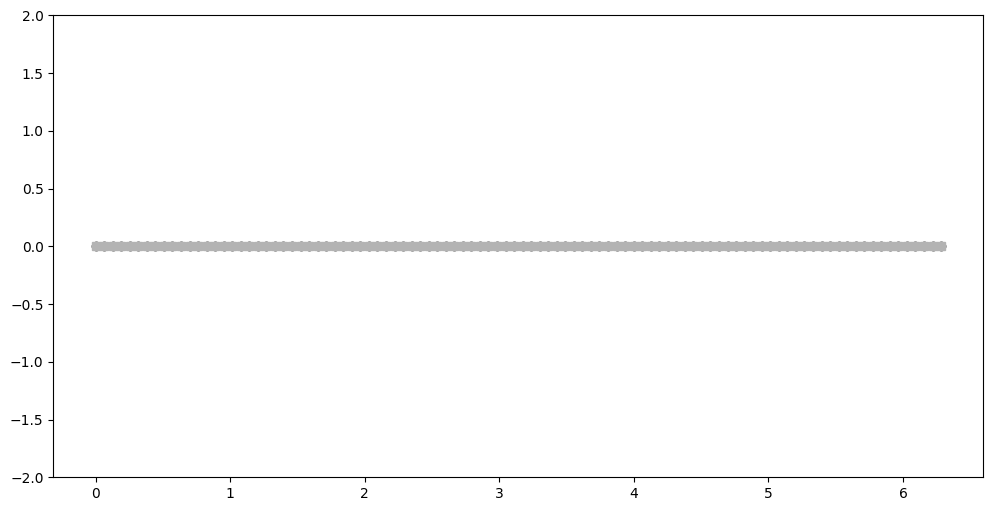

In [21]:
# function to draw the plots
def aframe(ph):

  # create the transformation matrix
  T = np.array([ [  1-ph/3,0 ],
                 [  0,ph   ] ])

  # apply the transformation to the points using matrix multiplication
  P1 = T@Y1
  P2 = T@Y2

  # update the lower/upper lines
  plth1.set_xdata(P1[0,:])
  plth1.set_ydata(P1[1,:])

  plth2.set_xdata(P2[0,:])
  plth2.set_ydata(P2[1,:])

  # export the plot handles
  return (plth1,plth2)

# define XY points
th = np.linspace(0,2*np.pi,100) # th = theta (angles)
Y1 = np.vstack((th,np.cos(th)))
Y2 = np.vstack((th,np.sin(th)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(Y1[0,:],Y1[1,:],'ko')
plth2, = ax.plot(Y2[0,:],Y2[1,:],'s',color=[.7,.7,.7])
ax.set_ylim([-2,2])


# define phases and run animation
phi = 1-np.linspace(-1,1-1/40,40)**2
animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)

 ### Question 7-5.Smooth the 3D bathtub picture.The  output  of  the  convolve2d  function  has  a  data  type  float64  (you  can  see  this yourself  by  typing  variableName.dtype).  However,  plt.imshow  will  give  a  warningabout  clipping  numerical  values,  and  the  picture  won’t  render  properly.  Therefore,you’ll need to convert the result of convolution to uint8.

float64
uint8


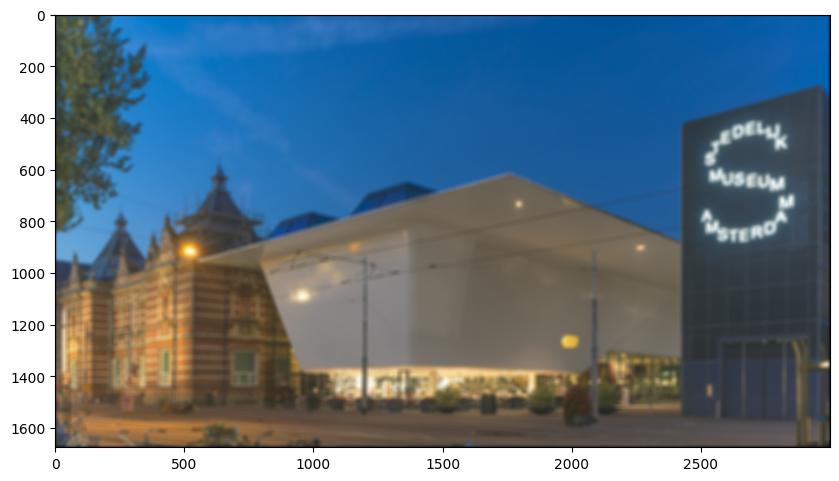

In [26]:
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')

# check data types
print( smooth_bathtub.dtype )
print( smooth_bathtub.astype(np.uint8).dtype )
fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

### Question 7-6. You  don’t  need  to  use  the  same  kernel  for  each  color  channel.  Change  the  width parameter  of  the  Gaussian  for  each  channel  according  to  the  values  shown  in  Figure  7-10.  The  effect  on  the  image  is  subtle,  but  the  different  blurs  of  the  different colors give it a bit of a 3D look, as if you are looking at a red-blue anaglyph without the glasses.
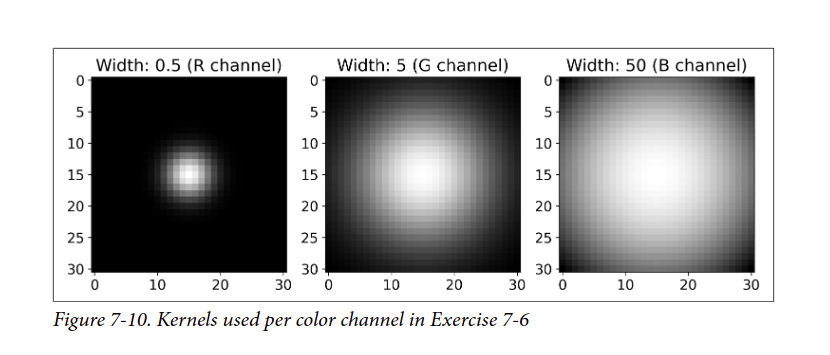

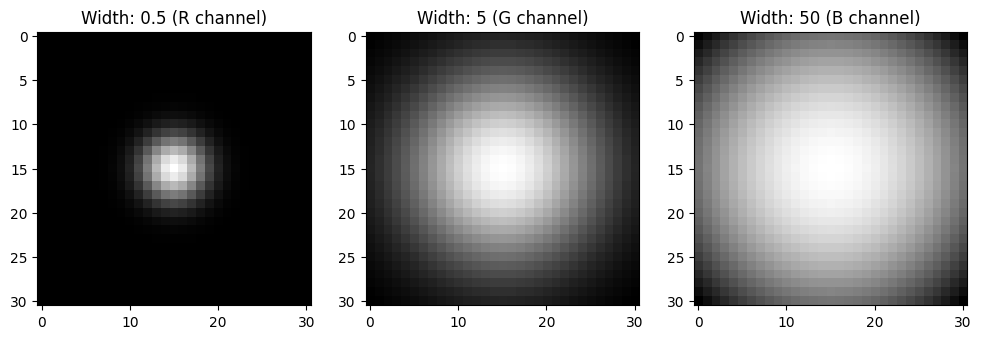

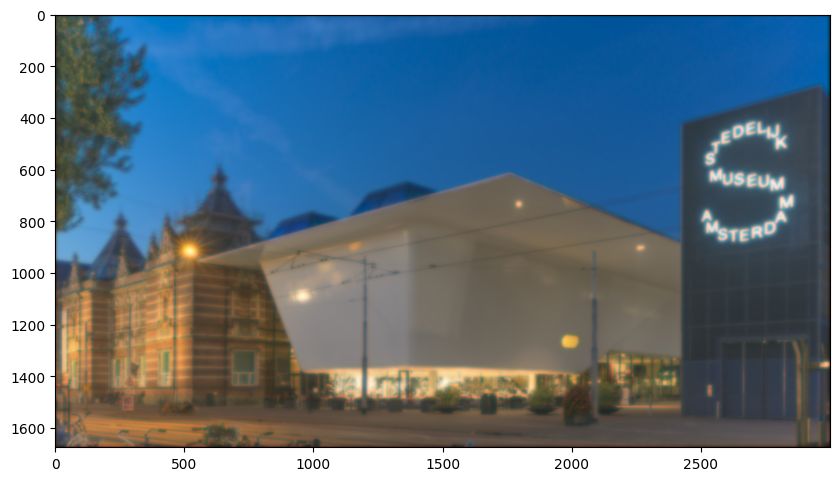

In [27]:
# layer-specific kernel widths
kernelN = 31
kernelWidths = [.5,5,50]


# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# to show the kernels
_,axs = plt.subplots(1,3,figsize=(12,6))

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):

  # create kernel
  Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
  kernel  = np.exp( -(X**2+Y**2) / kernelWidths[i] )
  kernel  = kernel / np.sum(kernel) # normalize

  # visualize the kernels
  axs[i].imshow(kernel,cmap='gray')
  axs[i].set_title(f'Width: {kernelWidths[i]} ({"RGB"[i]} channel)')

  # now run convolution
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i],kernel,mode='same')


plt.show() # close the kernels figure


# show the smoothed image
fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

### 7-7.Technically,  image  smoothing  is  feature  extraction,  because  it  involves  extracting the  smooth  features  of  the  signal  while  dampening  the  sharp  features.  Here  we  will change the filter kernels to solve other image feature detection problems: identifying horizontal and vertical lines.The  two  kernels  are  shown  in  Figure  7-11,  as  are  their  effects  on  the  image.  You can  handcraft  the  two  kernels  based  on  their  visual  appearance;  they  are  3 × 3  and comprise  only  the  numbers  −1,  0,  and  +1.  Convolve  those  kernels  with  the  2D grayscale picture to create the feature maps shown in Figure 7-11.
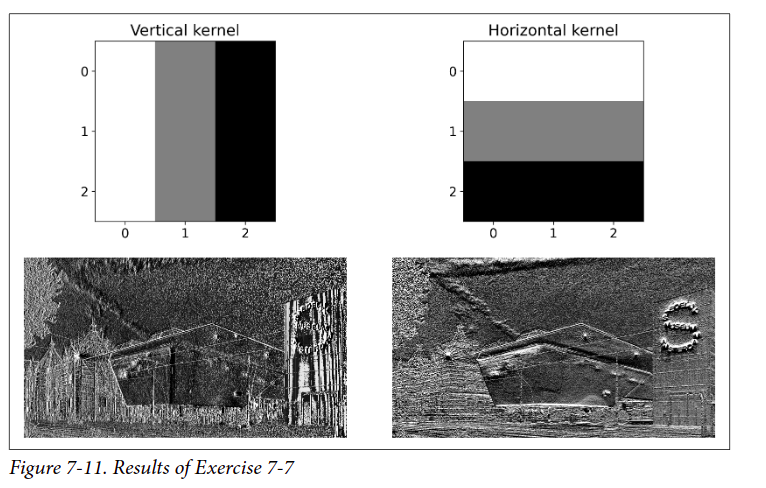

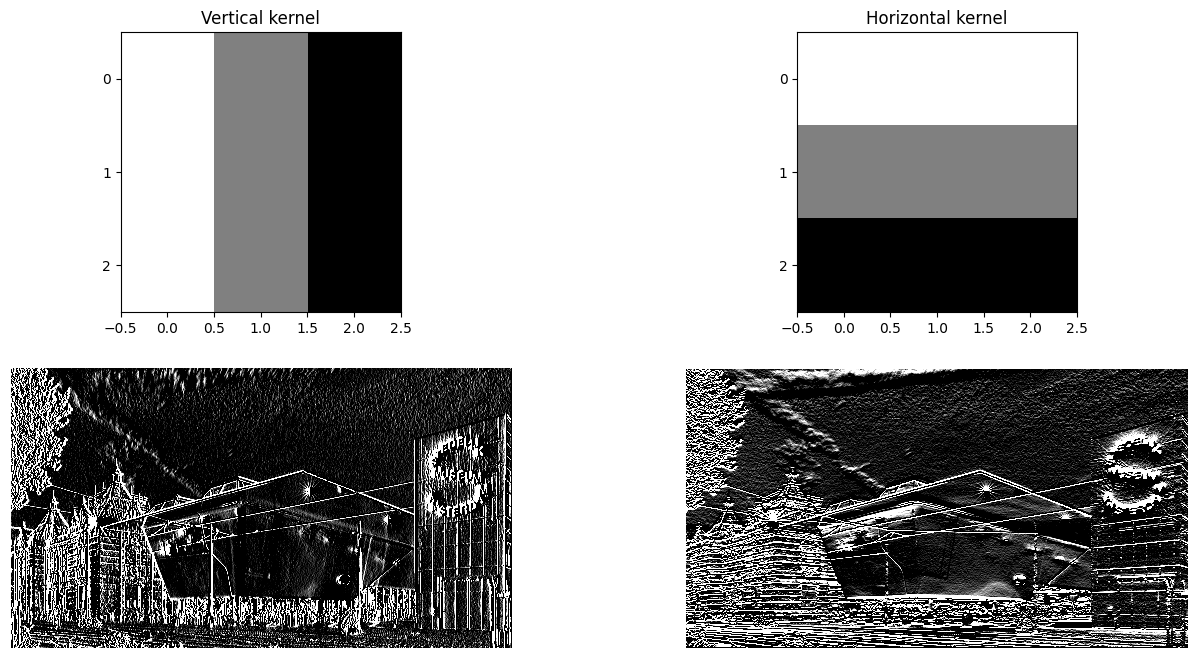

In [29]:
# Create two feature-detection kernels

# vertical kernel
VK = np.array([ [1,0,-1],
                [1,0,-1],
                [1,0,-1] ])

# horizontal kernel
HK = np.array([ [ 1, 1, 1],
                [ 0, 0, 0],
                [-1,-1,-1] ])
fig,ax = plt.subplots(2,2,figsize=(16,8))

ax[0,0].imshow(VK,cmap='gray')
ax[0,0].set_title('Vertical kernel')
ax[0,0].set_yticks(range(3))

ax[0,1].imshow(HK,cmap='gray')
ax[0,1].set_title('Horizontal kernel')
ax[0,1].set_yticks(range(3))

# run convolution and show the result
bathtub2d = color.rgb2gray(bathtub)
convres = convolve2d(bathtub2d,VK,mode='same')
ax[1,0].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,0].axis('off')

convres = convolve2d(bathtub2d,HK,mode='same')
ax[1,1].imshow(convres,cmap='gray',vmin=0,vmax=.01)
ax[1,1].axis('off')

plt.show()